<a href="https://colab.research.google.com/github/ModupalliParimala/Music_Genres_Classification/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genres Classification

In [ ]:
%tensorflow_version 2.x
!pip install pydub

In [ ]:
import os
import csv
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
import librosa.display
from IPython.display import SVG
from pydub import AudioSegment

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Deep_Learning/Projects/

/content/gdrive/MyDrive/Deep_Learning/Projects


# Downloading data

In [ ]:
#!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

In [ ]:
#!tar xf /content/gdrive/MyDrive/Deep_Learning/Projects/genres.tar.gz -C /content/gdrive/MyDrive/Deep_Learning/Projects/

we have to transform raw data from audio samples into more meaningful representations. The audio clips need to be converted from .au format to .wav format to make it compatible with python’s wave module for reading audio files.

# Convert Audio files to wav files

In [ ]:
genre_dirs = glob("/content/gdrive/MyDrive/Deep_Learning/Projects/genres/*",recursive=True)

for genre_dir in genre_dirs:
	# change directory to genre_dir
  print(genre_dir)
  os.chdir(genre_dir)

	# loop through each file in current dir
  for file in os.listdir(genre_dir):
    covert=AudioSegment.from_file(str(file))
    covert.export(str(file[:-3]) + ".wav",format="wav")

	# delete .au from current dir
  os.system("rm *.au")

print("Conversion complete. Check respective directories.")

# Feature Extraction From Audio files

**Features of Audio files**:


1.chroma_stft:Compute a chromagram from a waveform or power 
spectrogram.

2.spectral_centroid:It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.it is used to calculate the spectral centroid for each frame.

3.spectral_bandwidth:The spectral bandwidth for each frame
spectral_rolloff:Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.It is used to calculate rolloff for a given frame.

4.rmse:root-mean-square (RMS) value for each frame, either from the audio samples  or from a spectrogram .

5.zero_crossing_rate:The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.

6.MFCC:The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features which concisely describe the overall shape of a spectral envelope.default number of coefficients returned are 20.






<Figure size 432x432 with 0 Axes>

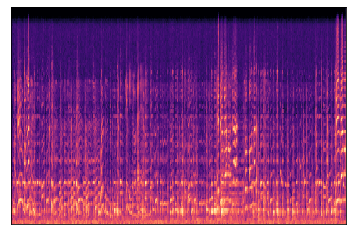

In [ ]:
y,sr = librosa.load('/content/gdrive/MyDrive/Deep_Learning/Projects/genres/blues/blues.00020.wav')
mels = librosa.feature.melspectrogram(y=y,sr=sr)
plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111)
fig = plt.figure()
p = librosa.display.specshow(librosa.power_to_db(mels,ref=np.max))
z = librosa.power_to_db(mels,ref=np.max)
#print(z)
plt.savefig('/content/gdrive/MyDrive/Deep_Learning/Projects/mel8.png')
plt.imsave('/content/gdrive/MyDrive/Deep_Learning/Projects/mel7.png',z)

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [ ]:
file = open('Extracted_features.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('Extracted_features.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('Extracted_features.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754759,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149013,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198799,-35.605450,22.153301,-32.489265,10.864513,-23.357929,0.503118,-11.805833,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409332,-11.703781,blues
